# Learn XOR using a Neural Network

For demonstration purposes, we learn neural network models of increasing complexity implementing the XOR function. Eventually, we will arrive at the model suggested in this [tutorial](https://blog.thoughtram.io/machine-learning/2016/11/02/understanding-XOR-with-keras-and-tensorlow.html).

## Imports

In [1]:
!pip install numpy 
!pip install tensorflow 
!pip install sklearn 

In [2]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt

## Create the XOR function as data

In [3]:
# Create XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Y = np.array([[0],[1],[1],[0]], "float32")

# Dataset shape
print("Input: {0}".format(X.shape))
print("Output: {0}".format(Y.shape))

Input: (4, 2)
Output: (4, 1)


## Model 1

Define and train a too trivial neural network model: one neuron, three parameters, purely linear and, hence, it misses 50% of the right answers.

In [7]:
# Define the model
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='linear'))

# Compile the model
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


[]

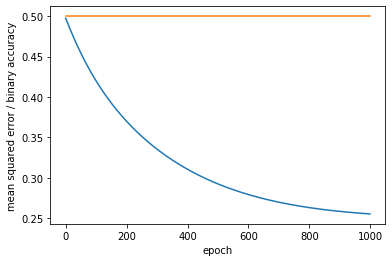

In [8]:
# Train the model
history = model1.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [9]:
preds = model1.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.26
Binary accuracy: 0.50


In [10]:
preds

array([[0.4074329 ],
       [0.5479205 ],
       [0.43225238],
       [0.57273996]], dtype=float32)

Use the model

In [11]:
def my_xor(x1,x2,m):
    """Return x1 XOR x2."""
    res =  m.predict(np.array([[x1,x2]], "float32")).round()
    return int(res[0][0])

In [12]:
print(format(my_xor(0,0, model1)))
print(format(my_xor(0,1, model1)))
print(format(my_xor(1,0, model1)))
print(format(my_xor(1,1, model1)))

0
1
0
1


## Model 2

The slightly more complex neural network model introduces a sigmpod activation function. It is hence not linear anymore. However, one neuron is not enough. Its accuracy does not improve.

In [13]:
# Define the model
model2 = Sequential()
model2.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile the model
model2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


[]

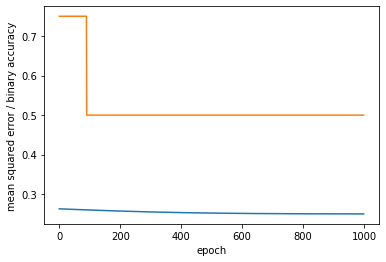

In [14]:
# Train the model
history = model2.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [15]:
preds = model2.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.25
Binary accuracy: 0.50


In [16]:
preds

array([[0.51002544],
       [0.51442444],
       [0.4854492 ],
       [0.4898481 ]], dtype=float32)

Use the model

In [17]:
print(format(my_xor(0,0, model2)))
print(format(my_xor(0,1, model2)))
print(format(my_xor(1,0, model2)))
print(format(my_xor(1,1, model2)))

1
1
0
0


## Model 3

We add a hidden layer with 32 neurons and a linear activation function:

In [18]:
# Define the model
model3 = Sequential()
model3.add(Dense(32, input_dim=2, activation='linear'))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

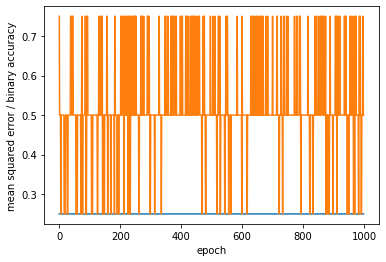

In [19]:
# Train the model
history = model3.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [20]:
preds = model3.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.25
Binary accuracy: 0.50


In [21]:
preds

array([[0.5       ],
       [0.49999994],
       [0.49999997],
       [0.49999994]], dtype=float32)

Use the model

In [22]:
print(format(my_xor(0,0, model3)))
print(format(my_xor(0,1, model3)))
print(format(my_xor(1,0, model3)))
print(format(my_xor(1,1, model3)))

0
0
0
0


## Model 4

Finally we change the linear activation of the hidden layer to a relu activation, define and train the neural network model:

In [23]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

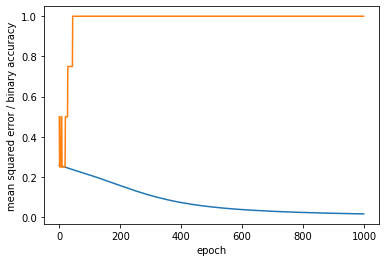

In [24]:
# Train the model
history = model.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [25]:
preds = model.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.02
Binary accuracy: 1.00


In [26]:
preds

array([[0.2231865 ],
       [0.9265102 ],
       [0.9262619 ],
       [0.07314506]], dtype=float32)

Use the model

In [27]:
print(format(my_xor(0,0, model)))
print(format(my_xor(0,1, model)))
print(format(my_xor(1,0, model)))
print(format(my_xor(1,1, model)))

0
1
1
0


In [28]:
model.trainable_weights

[<tf.Variable 'dense_7/kernel:0' shape=(2, 32) dtype=float32, numpy=
 array([[ 0.5841585 , -0.40610948,  0.47656116,  0.42090777,  0.67791224,
         -0.6785542 ,  1.01337   , -0.09686431, -0.7274387 , -0.35593182,
          0.85415804,  0.48906428,  0.43369898,  0.45748276,  0.03979011,
         -0.35918638, -0.00746563,  0.56471896, -0.18285531, -0.6517244 ,
         -0.8904212 , -0.3317663 , -0.13710234,  0.59699464,  0.5079917 ,
          0.0680659 ,  0.11669786, -0.13440311, -0.7058186 ,  0.00473294,
          0.8290723 ,  0.49467745],
        [ 0.42012337, -0.41425356,  0.476701  ,  0.4208277 , -0.67774546,
          0.6784214 , -0.9552125 , -0.04287672,  0.7275185 ,  0.13895619,
         -0.8537566 ,  0.48908606,  0.43375036,  0.45748317, -0.25806844,
         -0.3487216 , -0.31596452,  0.5646652 ,  0.07326906,  0.6516293 ,
          0.8903991 , -0.39805925, -0.05443189, -0.5967017 ,  0.3700263 ,
         -0.33955663, -0.28666174, -0.12362745,  0.71218073,  0.34388974,
       